<a href="https://colab.research.google.com/github/fspanda/FPL-Fantasy-Premier-league-Forecasting/blob/main/Code/Fantasy_League_XGBoost_player.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/vaastav/Fantasy-Premier-League.git

Cloning into 'Fantasy-Premier-League'...
remote: Enumerating objects: 5982, done.
remote: Counting objects: 100% (5982/5982), done.
remote: Compressing objects: 100% (3150/3150), done.
remote: Total 119401 (delta 2456), reused 5289 (delta 2329), pack-reused 113419
Receiving objects: 100% (119401/119401), 39.61 MiB | 2.76 MiB/s, done.
Resolving deltas: 100% (55602/55602), done.


In [ ]:
import os

file_list = os.listdir('/content/Fantasy-Premier-League/data/2019-20/players')
file_list

In [3]:
import pandas as pd
first = True
for name in file_list:  


  file=pd.read_csv("/content/Fantasy-Premier-League/data/2019-20/players/{}/gw.csv".format(name))
  file_length=len(file)
  tmp_X=file.drop('total_points',axis=1)

  tmp_Y=file[['total_points']]
  tmp_Y=tmp_Y.drop(0,axis=0)  
  tmp_X=tmp_X.drop(file_length-1,axis=0)
  tmp_X=tmp_X.drop("kickoff_time",axis=1)
  if first:
    first=False
    train_X=tmp_X
    train_Y=tmp_Y
  train_X=pd.concat([train_X,tmp_X])
  train_Y=pd.concat([train_Y,tmp_Y])




In [ ]:
'''
train_X_t=train_X.values
train_Y_t=train_Y.values
train_X_t = train_X_t.reshape(train_X.shape[0], train_X.shape[1] , 1)
train_X_t=train_X_t.astype(float)
train_Y_t=train_Y.astype(float)
'''

In [4]:
train_X.shape

(21873, 29)

In [37]:
import xgboost
xgb_model = xgboost.XGBRegressor(n_estimators=400, learning_rate=0.01, gamma=0, subsample=0.9,
                           colsample_bytree=1, max_depth=7)


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.1) 

In [39]:
xgb_model.fit(x_train,y_train)

[05:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

In [40]:
preds = xgb_model.predict(x_test)

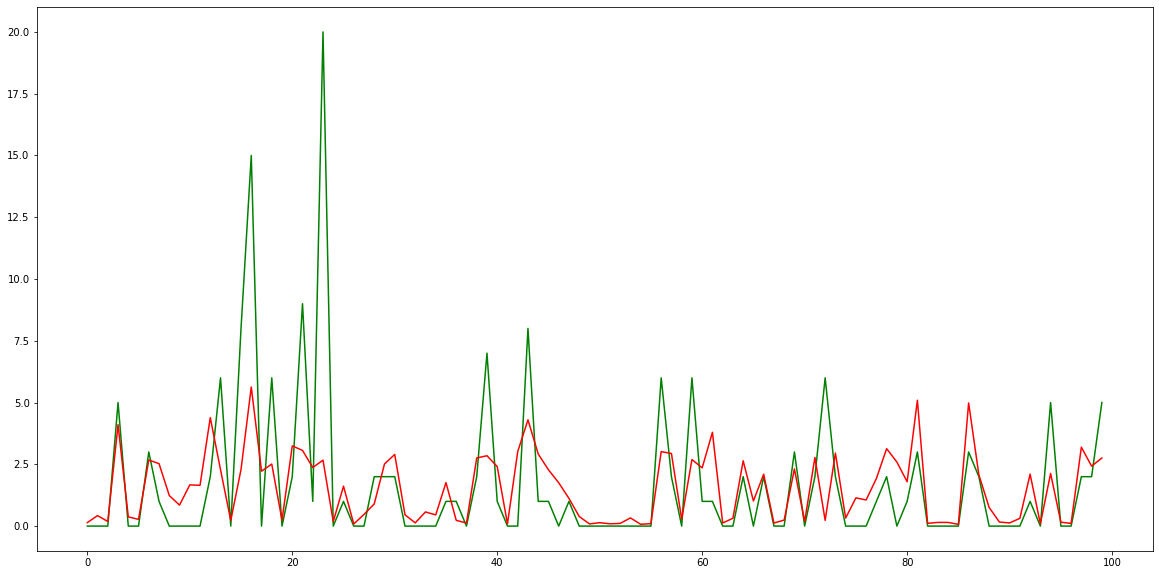

In [41]:

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
st=0
num=100
x=list(range(st,num))
plt.plot(x,y_test[st:num],color="green")
plt.plot(x,preds[st:num],color="red")
plt.show()


In [42]:
xgb_model.score(x_test,y_test)

0.2676185687168682

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)

In [44]:
mae

1.2363604332100757

In [45]:
mse

5.332703010338309

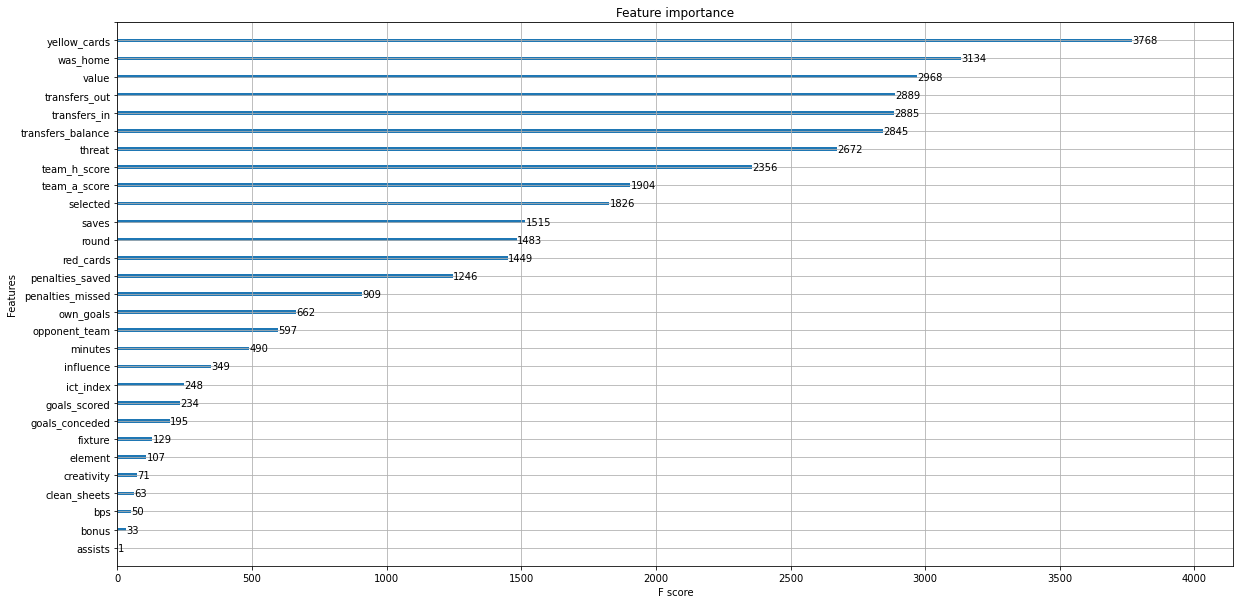

In [46]:
from xgboost import plot_importance # 중요변수 시각화
import matplotlib.pyplot as plt
plot_importance(xgb_model)
col_names=x_test.columns
plt.yticks(range(x_test.shape[1]+1), col_names)
plt.show()

In [29]:
x_test.shape[1]

29